In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm, trange

np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Data.xlsx')
df.shape

(1039, 41)

In [3]:
df.head()

,Warehouse id,Region,SKU id,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse id         1039 non-null   object
 1   Region               1039 non-null   object
 2   SKU id               1039 non-null   object
 3   2018-04-01 00:00:00  1039 non-null   int64 
 4   2018-05-01 00:00:00  1039 non-null   int64 
 5   2018-06-01 00:00:00  1039 non-null   int64 
 6   2018-07-01 00:00:00  1039 non-null   int64 
 7   2018-08-01 00:00:00  1039 non-null   int64 
 8   2018-09-01 00:00:00  1039 non-null   int64 
 9   2018-10-01 00:00:00  1039 non-null   int64 
 10  2018-11-01 00:00:00  1039 non-null   int64 
 11  2018-12-01 00:00:00  1039 non-null   int64 
 12  2019-01-01 00:00:00  1039 non-null   int64 
 13  2019-02-01 00:00:00  1039 non-null   int64 
 14  2019-03-01 00:00:00  1039 non-null   int64 
 15  2019-04-01 00:00:00  1039 non-null   int64 
 16  2019-0

In [5]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
2018-04-01 00:00:00,1039.000000,248.102984,785.750982,1.000000,9.000000,18.000000,191.000000,17540.000000
2018-05-01 00:00:00,1039.000000,216.824832,493.283000,1.000000,9.500000,19.000000,186.500000,5029.000000
2018-06-01 00:00:00,1039.000000,209.153994,480.078224,1.000000,10.000000,19.000000,192.500000,5823.000000
2018-07-01 00:00:00,1039.000000,157.714148,351.488015,1.000000,10.000000,18.000000,137.000000,3151.000000
2018-08-01 00:00:00,1039.000000,174.883542,450.706178,1.000000,9.000000,19.000000,128.000000,6700.000000
2018-09-01 00:00:00,1039.000000,158.524543,374.631088,1.000000,10.000000,19.000000,140.000000,4604.000000
2018-10-01 00:00:00,1039.000000,161.719923,376.697992,1.000000,9.000000,19.000000,127.500000,3576.000000
2018-11-01 00:00:00,1039.000000,201.784408,614.940984,1.000000,10.000000,19.000000,143.500000,10322.000000
2018-12-01 00:00:00,1039.000000,212.032724,766.657455,1.000000,10.000000,19.000000,170.000000,18336.000000
2019-01-01 00:00:00,1039.000000,177.205967,790.932939,1.000000,10.000000,20.000000,130.500000,19324.000000


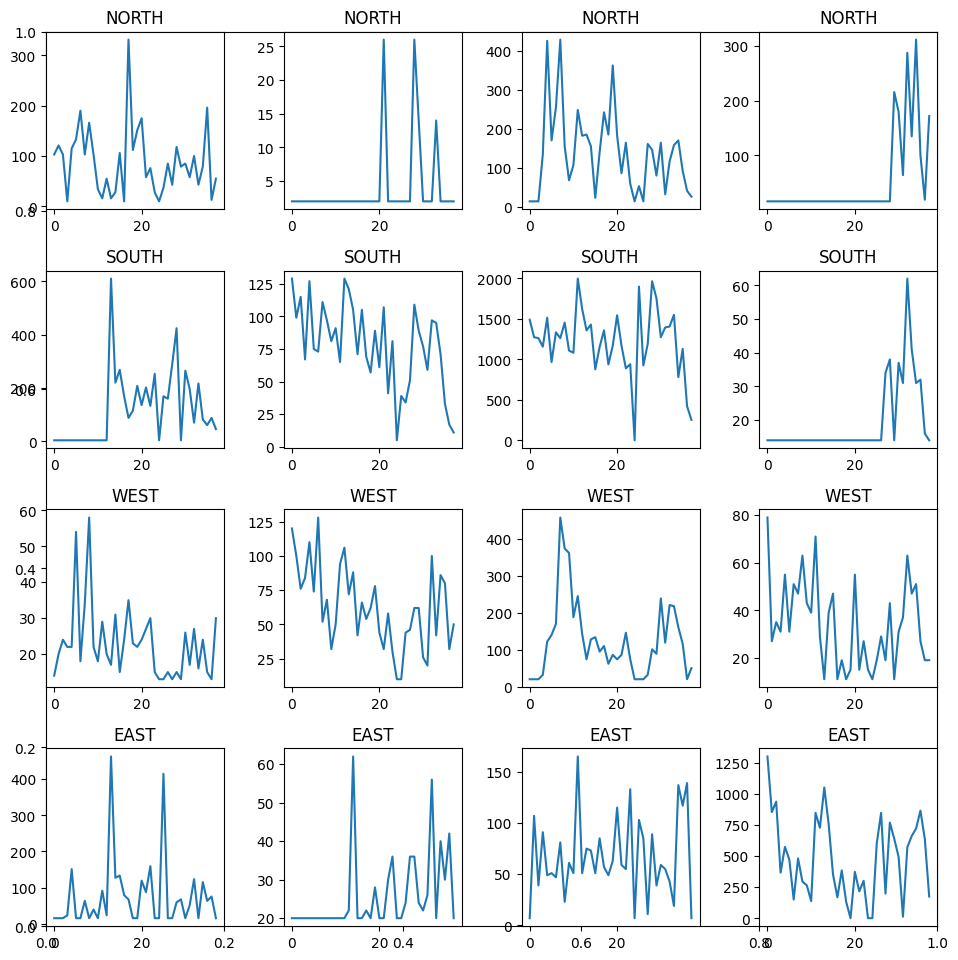

In [6]:
regions = ["NORTH", "SOUTH", "WEST", "EAST"]

plt.subplots(figsize=(10, 10))
for i, region in enumerate(regions):
    temp=df[df["Region"]==region]
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        idx=np.random.randint(0, temp.shape[0])
        plt.plot(temp.iloc[idx][3:].values)
        plt.title(region)
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

stationary_status = []
for i in tqdm(range(df.shape[0])):
    data = df.iloc[i][3:].values
    data=np.array(data, dtype=float)

    if(data.mean()==data[0]):
        stationary_status.append(True)
        continue
        
    result = adfuller(data)
    if result[1] > 0.05:
        stationary_status.append(False)
    else:
        stationary_status.append(True)

100%|█████████████████████████████████████████████████████████████████████████████| 1039/1039 [00:05<00:00, 186.51it/s]


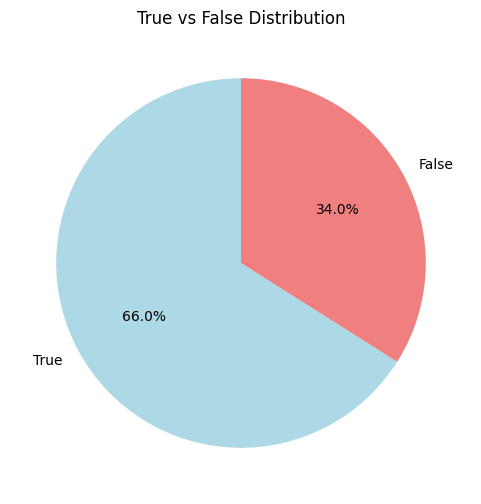

In [8]:
counts = {True: stationary_status.count(True),
          False: stationary_status.count(False)}
labels = ['True', 'False']
sizes = [counts[True], counts[False]]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'lightcoral'])
plt.title('True vs False Distribution')
plt.show()

From the above Pie chart we can say that the most of the data is stationary that is around 65%. So, we can use d=0 in the tuple (p, d, q) that we are supposed to provide while creating predictions from the ARIMA model.

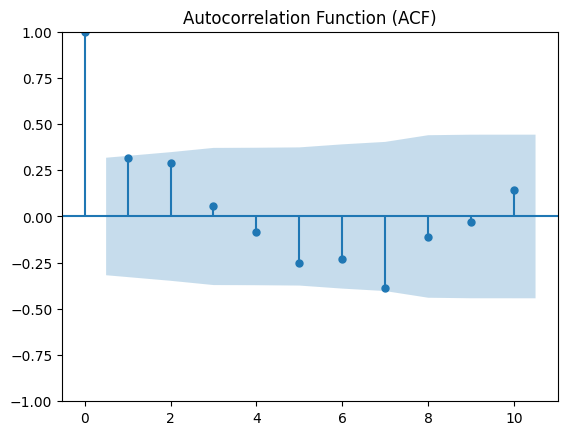

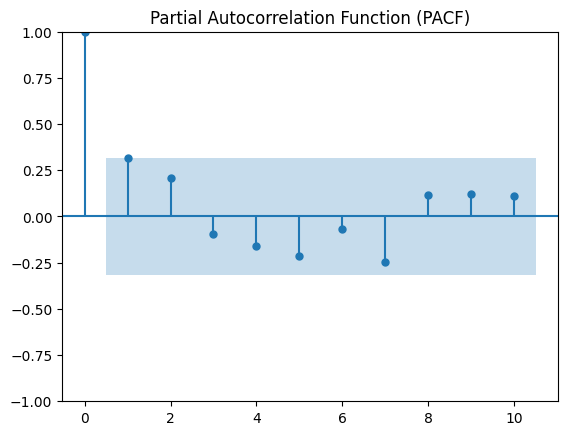

In [9]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = df.iloc[1][3:].values
data=np.array(data, dtype=float)

# ACF Plot (for q)
plot_acf(data, lags=10)
plt.title("Autocorrelation Function (ACF)")
plt.show()

# PACF Plot (for p)
plot_pacf(data, lags=10, method="ywm")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()   

After carefully Analyzing the ACF and PACF plots for most of the rows in the given dataset we can say that q=1 and p=1 will be the appropriate value for the tuple (p, d, q) whcih is to be passed in the ARIMA model.

# Forecasting using ARIMA Model

In [10]:
from statsmodels.tsa.arima.model import ARIMA

preds, target = [], []
for i in tqdm(range(df.shape[0])):
    data = df.iloc[i][3:-1].values
    data=np.array(data, dtype=float)
    target.append(df.iloc[i][-1])
    
    model = ARIMA(data, order=(1, 0, 1), missing="None")
    model = model.fit()
    forecast = model.forecast(steps=1)[0]
    preds.append(forecast)

 16%|█████████████                                                                  | 171/1039 [00:24<01:46,  8.15it/s]C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 30%|███████████████████████▌                                                       | 310/1039 [00:43<01:41,  7.19it/s]C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 39%|██████████████████████████████▍                                                | 401/1039 [00:54<01:15,  8.49it/s]C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 40%

In [11]:
from sklearn.metrics import mean_absolute_percentage_error
score=mean_absolute_percentage_error(target, preds)
score

5.886562081092301

So, we are getting a MAPE score of 6% approximately if we use all the previous data to predict the May-21 inventory requirements.

# Predictions
Let's use all the previous data for each row to predict the sales for the June'21.

In [12]:
preds = []
for i in tqdm(range(df.shape[0])):
    data = df.iloc[i][3:].values
    data=np.array(data, dtype=float)    
    model = ARIMA(data, order=(1, 0, 1), missing="None")
    model = model.fit()
    forecast = model.forecast(steps=1)[0]
    preds.append(forecast)

 17%|█████████████▏                                                                 | 174/1039 [00:22<02:04,  6.93it/s]C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 18%|██████████████▏                                                                | 186/1039 [00:23<01:37,  8.74it/s]C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 32%|█████████████████████████▍                                                     | 334/1039 [00:41<01:20,  8.75it/s]C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 68%

In [14]:
ss = pd.read_excel('Submission Format.xlsx', header=0)
ss[ss.columns[-1]]=preds
ss.head()

,Warehouse id,Region,SKU id,2021-06-01 00:00:00
0,Wh-1,NORTH,SKU-1,12.567632
1,Wh-1,NORTH,SKU-2,38.706482
2,Wh-1,NORTH,SKU-3,7.179476
3,Wh-1,NORTH,SKU-4,130.111958
4,Wh-1,NORTH,SKU-5,219.633367


In [15]:
ss.to_csv("AbhishekMaurya.csv", index=False)